## Image Classification on MNIST using CNN and KERAS

### 1. Loading Data

In [20]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 2. Visualizing Data

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

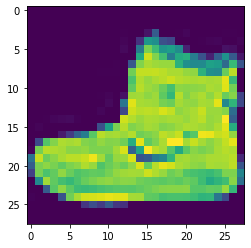

In [13]:
plt.imshow(X_train[0])

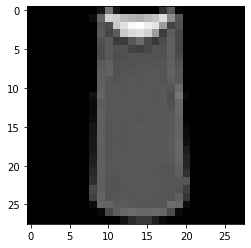

In [14]:
plt.imshow(X_train[2],cmap='gray')

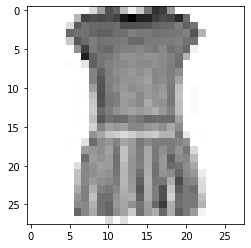

In [15]:
plt.imshow(X_train[3],cmap='gray_r')

## 3. Normalize DATA

In [24]:
print(X_train.max())
print(X_test.max())

X_train = X_train/255
X_test = X_test/255

print(X_train.max())
print(X_test.max())

255
255
1.0
1.0


## 4. Reshape X arrays to include a 4 dimension of single channel

In [25]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [26]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## 5. Convert Y Values to Cateogorical (ONE-HOT-ENCODING)

In [27]:
from keras.utils import to_categorical

In [29]:
print(y_train)
print(y_test)

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


In [30]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [33]:
print(y_cat_train)
print('\n')
print(y_cat_test)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## BUILD THE MODEL

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [38]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', 
             optimizer='rmsprop',
             metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


## Train/Fit the Model

In [40]:
model.fit(X_train, y_cat_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.4080 - accuracy: 0.8545
Epoch 2/10
60000/60000 [==============================] - 42s 705us/step - loss: 0.2794 - accuracy: 0.8996
Epoch 3/10
60000/60000 [==============================] - 40s 662us/step - loss: 0.2390 - accuracy: 0.9147
Epoch 4/10
60000/60000 [==============================] - 40s 672us/step - loss: 0.2149 - accuracy: 0.9240
Epoch 5/10
60000/60000 [==============================] - 40s 672us/step - loss: 0.1977 - accuracy: 0.9288
Epoch 6/10
60000/60000 [==============================] - 40s 669us/step - loss: 0.1812 - accuracy: 0.9360
Epoch 7/10
60000/60000 [==============================] - 40s 675us/step - loss: 0.1689 - accuracy: 0.9403
Epoch 8/10
60000/60000 [==============================] - 41s 676us/step - loss: 0.1597 - accuracy: 0.9435s - loss: 0.1592 - accuracy:  - ETA: 1s
Epoch 9/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.1490 - accuracy: 0.948

## SAVING MODEL FOR FUTURE REFERENCE

In [43]:
model.save('mnistClassification.h5')

In [44]:
from keras.models import load_model

In [45]:
load_model

<function keras.engine.saving.load_model(filepath, custom_objects=None, compile=True)>

In [48]:
new_model = load_model('mnistClassification.h5')
new_model

In [47]:
model.metrics_names

['loss', 'accuracy']

In [49]:
newmodel.metrics_names

['loss', 'accuracy']

## MODEL EVALUATION

In [51]:
model.evaluate(X_test, y_cat_test)

10000/10000 [==============================] - 2s 152us/step


[0.35212717237472535, 0.9042999744415283]

In [52]:
new_model.evaluate(X_test, y_cat_test)

10000/10000 [==============================] - 2s 163us/step


[0.35212717237472535, 0.9042999744415283]

## PREDICTION

In [53]:
from sklearn.metrics import classification_report

In [55]:
model_preds = model.predict_classes(X_test)
print(classification_report(y_test, model_preds))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.80      0.90      0.85      1000
           3       0.92      0.91      0.92      1000
           4       0.88      0.77      0.82      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.71      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.96      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [56]:
new_model_preds = new_model.predict_classes(X_test)
print(classification_report(y_test, new_model_preds))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.80      0.90      0.85      1000
           3       0.92      0.91      0.92      1000
           4       0.88      0.77      0.82      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.71      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.96      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [57]:
new_model_preds

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [58]:
len(new_model_preds)

10000

In [59]:
model_preds

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [60]:
len(model_preds)

10000